# 2. Discrete random variables


 #### [Back to main page](https://petrosyan.page/fall2020math3215)


___
### Example 1

Consider the  double coin flip experiment $S=\{HH, HT, TH, TT\}$, and define a random variable which counts the number of heads in each outcome. Then 
$$X(HH)=2,\;X(HT)=1,\;X(TH)=1,\; X(TT)=0.$$
 
Observe that Range$(X)=\{0,1,3\}$ and the pmf of the random variable is 
        
$$f(0)=0.25,\; f(1)=0.5,\; f(2)=0.15.$$

Below we draw the line graph and the histogram of the pmf of this random variable. Red circles represent the range of $X$.

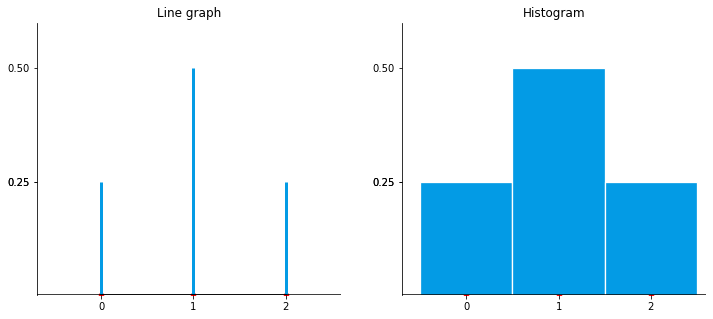

In [8]:
# nbi:hide_in
# library
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["figure.figsize"] = (12, 5)


range_x = np.array([0, 1, 2])
pmf_values = np.array([1/4, 1/2, 1/4])

fig, [ax1, ax2] = plt.subplots(1,2, num=1, clear=True)

ax1.set_ylim(0,0.6) 
ax1.set_xlim(-0.7, 2.6)
ax1.axhline(y=0, color='k')
ax1.set_xticks(range_x)
ax1.set_yticks(pmf_values)
ax1.spines["top"].set_visible(False)  
ax1.spines["right"].set_visible(False)
ax1.spines["bottom"].set_visible(False)

ax2.set_ylim(0, 0.6) 
ax2.set_xlim(-0.7, 2.6)
ax2.axhline(y=0, color='k')
ax2.set_xticks(range_x)
ax2.set_yticks(pmf_values)
ax2.spines["top"].set_visible(False)  
ax2.spines["right"].set_visible(False)
ax2.spines["bottom"].set_visible(False)

# Plotting line graphs using plt.stem with stems removed
ax1.scatter(range_x,np.zeros(range_x.shape), color ="red", s=20)
markers,stems,base = ax1.stem(range_x, pmf_values, markerfmt=' ', 
                              linefmt='#039be5', basefmt="black", use_line_collection=True)
stems.set_linewidth(3)
ax1.set_title("Line graph")


# PLotting with plt.bar instead of plt.hist works better when f(x) are knowwn
ax2.scatter(range_x,np.zeros(range_x.shape), color ="red", s=20)
ax2.bar(range_x, pmf_values, width=1, color='#039be5', edgecolor="w", linewidth=1.3, label="Histogran")
ax2.set_title("Histogram")


plt.show();
                       

___
### Example 2

If Range$(X)=\{x_1,\dots,x_k\}$ and $P(x_1)=\cdots=P(x_k)=\frac{1}{k}$ then we say that $X$ has uniform distribution.

in the example below, the range of $X$ is 

$$ \text{Range}(X)=\{-3, -6, 5, 9, 2, 1, 3, 8, 7, 10\}$$

with $f(x)=0.1$ for every $x\in \text{Range}(X).$

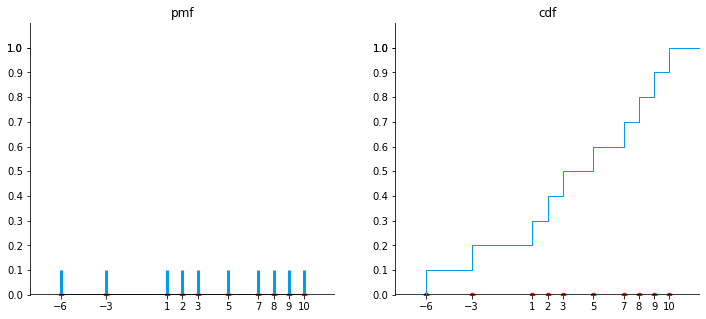

In [2]:
# nbi:hide_in
# library
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["figure.figsize"] = (12, 5)

K=10
range_x=np.array([-3, -6, 5, 9, 2, 1, 3, 8, 7, 10])
pmf_values=np.ones(range_x.size)/range_x.size

# Sort x and y according to order in x
sortargs = range_x.argsort()
range_x = range_x[sortargs]
pmf_values = pmf_values[sortargs]

#cdf values using cumsum function with padding
cdf_values = np.cumsum(pmf_values)

def padding(cdf_values, range_x):
    edge = (range_x[0]-2, range_x[-1]+2)
    range_x_padded = np.pad(range_x, (1,1), 'constant', constant_values=edge)
    cdf_values_padded = np.pad(cdf_values, (1,1), 'constant', constant_values=(0, 1))
    return cdf_values_padded, range_x_padded, edge

cdf_values_padded, range_x_padded, edge = padding(cdf_values, range_x)
# setting up the figure
fig, [ax1, ax2] = plt.subplots(1,2, num=1, clear=True)

ax1.set_ylim(0,1.1)
ax1.axhline(y=0, color='k')
ax1.set_xlim(edge)
ax1.set_xticks(range_x)
ax1.set_yticks(cdf_values_padded)
ax1.spines["top"].set_visible(False)  
ax1.spines["right"].set_visible(False)
ax1.spines["bottom"].set_visible(False)

ax2.set_ylim(0,1.1) 
ax2.axhline(y=0, color='k')
ax2.set_xlim(edge)
ax2.set_xticks(range_x)
ax2.set_yticks(cdf_values_padded)
ax2.spines["top"].set_visible(False)  
ax2.spines["right"].set_visible(False)
ax2.spines["bottom"].set_visible(False)

# plot line grapghs
ax1.scatter(range_x,np.zeros(range_x.shape), color ="red", s=20)
markers,stems,base = ax1.stem(range_x, pmf_values, markerfmt=' ',
                              linefmt='#039be5', basefmt="black", use_line_collection=True)
stems.set_linewidth(3)
ax1.set_title("pmf")

# plot cdf using step function
ax2.scatter(range_x,np.zeros(range_x.shape), color ="red", s=20)
ax2.step(range_x_padded, cdf_values_padded, linewidth=1, where='post', color='#039be5',)
ax2.set_title("cdf")

plt.show();

___
### Relative frequency histogram for pmf

Suppose our data   consists of values of the random variable on a sequence of trial outcomes. As mentioned earlier, probability of an event represents how frequent the experiment outcome terminates in the event, in a large number of repetitive trials. Hence,  the pmf at $x\in\text{Range}(X)$ can be empirically estimated using the relative frequency 

 $$f_{\text{emp}}(x)= \frac{\text{number of elements in data = }x}{ \text{ size of data}}.$$
 
Resulting relative frequency histogram will approximate the pmf histogram.

In the example below, we consider the following experiment: a dice is tossed twice and the random variable is the maximum of the two tosses: 

$$S=\{(i,j):\; 1\leq i\leq n, 1\leq j\leq 6\}$$

and for any $s=(i,j)$,
      
 $$X(i,j)=\max\{i,j\}.$$
 
 It can be seen that in this case, $\text{range}(X)=\{1,\dots, n\}$ and, for any $x\in \text{range}(X)$,
 
 $$f(x)=\frac{2x-1}{n^2}.$$

The data consist of values of $X$ on 1000 random pairs of tosses.

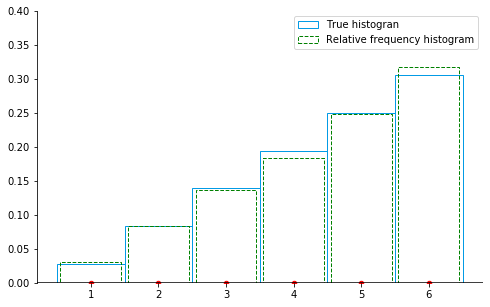

In [3]:
# nbi:hide_in
# library
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["figure.figsize"] = (8, 5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

n = 6
num_samples=1000

range_x = np.arange(1,n+1)
pmf_values = np.array([(2*i-1)/n**2 for i in range(1,n+1)])

# generate data
toss = np.random.randint(1,n+1,(2,num_samples))
data = np.amax(toss, axis=0).squeeze()

# compute empirical pmf
def epmf(data):
    erange_x, counts = np.unique(data, return_counts=True)
    epmf_values = counts/data.size
    return epmf_values, erange_x

epmf_values, erange_x = epmf(data)

# plot 
plt.ylim(0,0.4) 
plt.axhline(y=0, color='k')
plt.xticks(range_x)

plt.scatter(range_x,np.zeros(range_x.shape), color ="red", s=20)
plt.bar(range_x, pmf_values, width=1, color=(1, 1, 1, 0), 
        edgecolor='#039be5', linewidth=1, label="True histogran")
plt.bar(erange_x, epmf_values, width=0.9, color=(1, 1, 1, 0), 
        edgecolor='green', linewidth=1,linestyle="--", label="Relative frequency histogram")
plt.legend()
plt.show();

___
### Empirical cdf

Similar to empirical pmf, the empirical cfd is computed as

$$F_{\text{emp}}(x)=\frac{\text{number of outomes }\leq x}{\text{size of data}}.$$

We consider the double die toss experiment. Let the random variable $X$ be the maximum of two tosses. Again,   $\text{Range}(X)=\{1,\dots, 6\}$ and it can be checked that
     $$F(x)=
\begin{cases}
0 & x<1\\
\sum\limits_{i=1}^k\frac{2i-1}{6^2}=\frac{k^2}{6^2} & k\leq x<k+1, \text{ for }k=1,\dots,5\\
1 & 6<x.
\end{cases}$$
In the numerical example below we collect 1000 pairs of tosses of the die and collect the maximum value of each pair as our data. The graph shows the real and the empirical cdf-s.

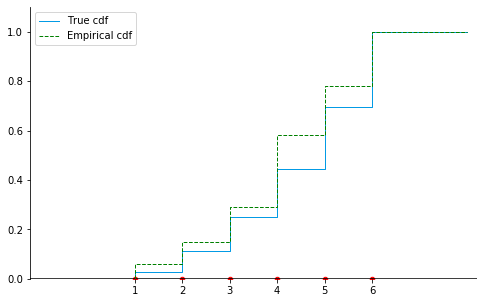

In [4]:
# nbi:hide_in
# library
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["figure.figsize"] = (8, 5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

n = 6
num_samples=100
range_x = np.arange(1,n+1)

# generate data
toss = np.random.randint(1,n+1,(2,num_samples))
data = np.amax(toss, axis=0).squeeze()

# compute true cdf values
cdf_values = np.array([i**2/n**2 for i in range(1,n+1)])

# compute empirical cdf values
def ecdf(data):
    erange_x, counts = np.unique(data, return_counts=True)
    cdf_emp = np.cumsum(counts)/data.size
    return cdf_emp, erange_x

ecdf_values, erange_x = ecdf(data)

# add padding 
def padding(cdf_values, range_x):
    edge = (range_x[0]-2, range_x[-1]+2)
    range_x_padded = np.pad(range_x, (1,1), 'constant', constant_values=edge)
    cdf_values_padded = np.pad(cdf_values, (1,1), 'constant', constant_values=(0, 1))
    return cdf_values_padded, range_x_padded

cdf_values_padded, range_x_padded = padding(cdf_values, range_x)
ecdf_values_padded, erange_x_padded = padding(ecdf_values, erange_x)

# plot setup
plt.ylim(0,1.1)
plt.xlim(-1.2,8.2)
plt.axhline(y=0, color='k')
plt.xticks(range_x)

# plot cdf using step function
plt.scatter(range_x,np.zeros(range_x.shape), color ="red", s=20)
plt.step(range_x_padded, cdf_values_padded, where='post', color='#039be5', linewidth=1, label="True cdf")
plt.step(erange_x_padded, ecdf_values_padded, where='post', color="green", linewidth=1, linestyle="--", label='Empirical cdf')
plt.legend()

plt.show();


### Bernoulli trials


**Definition**
    
<div class="alert alert-block alert-info">

In Bernoulli experiment the outcome is either of Type I (success) with probability $p$ or Type II (fail) with probability $q=1-p$. 

</div>

A **Bernoulli trials** are the outcomes of several independent Bernoulli experiments with the same success probabilities.

**Example**
Consider the coin flip experiment with a biased coin that lands head with probability $p$ and tail with probability $q=1-p$.A single coin flip will be a Bernoulli experiment.$n$ independent coin flips will be a Bernoulli trial.

### Geometric distribution

A random experiment has a probability of success equal to $p$ and probability of failure $q=1-p$. Consider the following new experiment: we are doing consecutive  random trials until we reach a success.The set of outcomes has the form $s=\overbrace{FF\cdots F}^{n-1} S$ where number of $F$'s can be any number $n=1,2,\dots$.  Due to independence, $P(s)=q^np$.  

Let $X(s)$ denote the number of trials it took to reach success

$$X(\overbrace{FF\cdots F}^{n-1} S)=n.$$

Observe that 

$$f(n)=q^{n-1}p,\quad n=1,2,\dots.$$

**Definition (Geometric distribution)**

<div class="alert alert-block alert-info">

The pmf of the random variable $X$ is called Geometric distribution.

</div>    

In [6]:
# nbi:hide_in
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact, FloatSlider


def geometric_pmf(p):
    q = 1-p
    N=15
    range_x = np.arange(1, N, 1)

    def geo_pmf(n):
        pmf_val = q**(n-1)*p
        return pmf_val
    mean = 1/p

    pmf_values = np.array([geo_pmf(n) for n in range_x])

    # plot setup
    plt.figure(figsize=(10,7)) 
    plt.axhline(y=0, color='k')
    plt.ylim(-0.01, max(np.max(pmf_values)+0.05, 0.2))
    plt.xlim(0, N+1)
    plt.xticks(np.arange(0, N+1, 5))
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['bottom'].set_visible(False)

    # PLotting with plt.bar instead of plt.hist works better when f(x) are knowwn
    plt.scatter(np.array([mean]),np.zeros(1), color ="red", s=200, label="Mean", zorder=3)
    plt.scatter(range_x,np.zeros(range_x.shape), color ="red", s=20)
    plt.bar(range_x, pmf_values, width=1, color='#039be5', edgecolor="w", linewidth=1.3)
    plt.title("Geometric distribution")
    plt.figtext(0.8,0.8, "p={}".format(p), ha="left", va="top",
            backgroundcolor=(0.1, 0.1, 1, 0.15), fontsize="large")
    plt.plot();

# create interactive variables
p = FloatSlider(min=0.01, max=1, step=0.01, value=0.4, readout_format='')

# display the interactive plot
interact(geometric_pmf, p=p);

interactive(children=(FloatSlider(value=0.4, description='p', max=1.0, min=0.01, readout_format='', step=0.01)…

### Binomial distribution


**Definition**

<div class="alert alert-block alert-info">

Let $X$ denote the number of successes in $n$ Bernoulli trials with success probability $p$. Then we say that $X$ has the \textbf{binomial distribution} with parameters $(n,p)$. 

</div>
    
If $X$ has binomial distribution with parameters $(n,p)$ then 
* $\text{range}(X)=\{0,1,\dots, n\}$.
* $$f(x)={n\choose x}p^xq^{(n-x)}$$ ${n\choose x}$ ways there can be $x$ successes: the rest $n-x$ are failures.

In [21]:
# nbi:hide_in
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact, FloatSlider, IntSlider
from scipy.special import comb

def binomial_pmf(n, p):
    q = 1-p
    range_x = np.arange(0, n, 1)

    def binom_pmf(x):
        pmf_val = comb(n, x, exact=True) * p**x * q**(n-x)
        return pmf_val
    mean = n*p

    pmf_values = np.array([binom_pmf(x) for x in range_x])
    
    # plot setup
    plt.figure(figsize=(10,7)) 
    plt.axhline(y=0, color='k')
    plt.ylim(-0.01, max(np.max(pmf_values)+0.05, 0.2))
    plt.xlim(-1, n+1)
    plt.xticks(np.arange(0, n+1, 5))
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['bottom'].set_visible(False)
    plt.title("Binomial distribution")

    # PLotting with plt.bar instead of plt.hist works better when f(x) are knowwn
    plt.scatter(np.array([mean]),np.zeros(1), color ="red", s=200, zorder=3)
    plt.scatter(range_x,np.zeros(range_x.shape), color ="red", s=20, zorder=2)
    plt.bar(range_x, pmf_values, width=1, color='#039be5', edgecolor="w", linewidth=1.3, zorder=1)
    #plt.title("Binomial distribution")
    plt.figtext(0.8,0.8, " n={} \n p={}".format(n, p), ha="left", va="top",
                backgroundcolor=(0.1, 0.1, 1, 0.15), fontsize="large")
    plt.plot();

# create interactive variables
p = FloatSlider(min=0.01, max=1, step=0.01, value=0.3, readout_format='')
n = IntSlider(min=1, max=100, step=1, value=20, readout_format='')
# display the interactive plot
interact(binomial_pmf, n=n, p=p);

interactive(children=(IntSlider(value=20, description='n', min=1, readout_format=''), FloatSlider(value=0.3, d…

#### cdf of the binomial distribution

The cdf of the binomial distribution can be computed as 
$$F(x)=E[X\leq x]=\sum_{y=0}^{\lfloor x\rfloor}{n\choose x}p^xq^{(n-x)}\text{ for } x\in [0,n].$$

However, $F(x)$ does not have a simple closed-form formula. In old times people would use statistical tables that show  precomputed values of the cdf for different choices of parameters $(n,p)$. Nowdays, computers can give you very precise values for the cdf for any $n,p,x$.

In the plot below, the shaded area is the value of the cdf at point $x$. The point $x$ is the black dot on the plot. The value of the cdf up to 4 digit precision is given at the top of the plot. 

In [22]:
# nbi:hide_in
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact, FloatSlider, IntSlider
from scipy.special import comb
from scipy.stats import binom

def binomial_cdf(n, p, x):
    q = 1-p
    range_x = np.arange(0, n, 1)

    def binom_pmf(x):
        pmf_val = comb(n, x, exact=True) * p**x * q**(n-x)
        return pmf_val
    mean = n*p

    pmf_values = np.array([binom_pmf(x) for x in range_x])
    
    # plot setup
    plt.figure(figsize=(10,7)) 
    plt.axhline(y=0, color='k')
    plt.ylim(-0.01, max(np.max(pmf_values)+0.05, 0.2))
    plt.xlim(-4, n+2)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['bottom'].set_visible(False)

    # PLotting with plt.bar instead of plt.hist works better when f(x) are knowwn
#     plt.scatter(x,np.zeros(1), color ="red", s=100, zorder=3)
    plt.scatter(range_x,np.zeros(range_x.shape), color ="red", s=20,zorder=2)
    barlist = plt.bar(range_x, pmf_values, width=1, color=(1, 1, 1, 0), edgecolor='#039be5',
                      linewidth=1, label="Histogran", zorder=1)
    for ind, val in enumerate(range_x):
        if val<=x:
            barlist[ind].set_color('#039be5')
            barlist[ind].set_edgecolor("w")    
    cdf = binom.cdf(x, n, p)
    plt.title("cdf and pdf of binomial distribution" )
    plt.figtext(0.7,0.8, " n={} \n p={} \n x={} \n cdf = {:.4f}".format(n, p, x, cdf), ha="left", va="top",
                backgroundcolor=(0.1, 0.1, 1, 0.15), fontsize="large")
    plt.plot();

# create interactive variables
p = FloatSlider(min=0.01, max=1, step=0.01, value=0.3, readout_format='')
n = IntSlider(min=1, max=100, step=1, value=20, readout_format='')
x = FloatSlider(min=-4, max=10, step=0.1, value=6.75, readout_format='')

# enforce values for x
def update_range(*args):
    x.max = max(n.value+4,10)
n.observe(update_range, 'value')

# display the interactive plot
interact(binomial_cdf, n=n, p=p, x=x);

interactive(children=(IntSlider(value=20, description='n', min=1, readout_format=''), FloatSlider(value=0.3, d…